In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import os

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts()) 

low      432
high     432
med      432
vhigh    432
Name: buying, dtype: int64
low      432
high     432
med      432
vhigh    432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 32)

In [14]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [15]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
507,high,vhigh,4,more,med,low
1248,med,low,4,2,big,low
494,high,vhigh,4,2,big,high
1306,low,vhigh,2,4,small,med
1168,med,med,5more,2,big,med


In [17]:

import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
507,1,1,1,1,1,1
1248,2,2,1,2,2,1
494,1,1,1,2,2,2
1306,3,1,2,3,3,3
1168,2,3,3,2,2,3


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
351,4,2,4,2,3,1
625,1,4,3,2,1,3
1243,2,2,1,2,3,3
1245,2,2,1,2,1,1
995,2,4,2,1,1,2


In [21]:
from sklearn.tree import DecisionTreeClassifier

**Criterion** gini

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
y_pred_gini = clf_gini.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print('Model accuracy score -> criterion -> gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score -> criterion -> gini index: 0.7968


In [25]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'acc'],
      dtype=object)

In [26]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7891


In [27]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7891
Test set score: 0.7968


**Tree with criterion gini**

[Text(251.10000000000002, 380.52, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [255, 47, 811, 44]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 382\nvalue = [0, 0, 382, 0]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\ngini = 0.578\nsamples = 775\nvalue = [255, 47, 429, 44]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\ngini = 0.489\nsamples = 512\nvalue = [124, 20, 343, 25]'),
 Text(83.7, 54.360000000000014, 'gini = 0.634\nsamples = 256\nvalue = [124, 20, 87, 25]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[1] <= 1.5\ngini = 0.629\nsamples = 263\nvalue = [131, 27, 86, 19]'),
 Text(418.5, 54.360000000000014, 'gini = 0.454\nsamples = 66\nvalue = [23, 0, 43, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.624\nsamples = 197\nvalue = [108, 27, 43, 19]')]

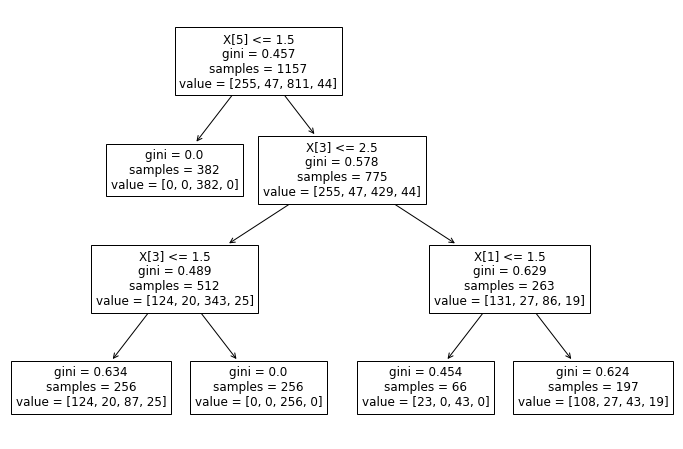

In [28]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

**Criterion** entropy

In [30]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
y_pred_en = clf_en.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

print('Model accuracy score -> criterion-> entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score -> criterion-> entropy: 0.7968


In [33]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'acc'],
      dtype=object)

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7891


In [35]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7891
Test set score: 0.7968


**Tree with criterion entropy**

[Text(251.10000000000002, 380.52, 'X[5] <= 1.5\nentropy = 1.207\nsamples = 1157\nvalue = [255, 47, 811, 44]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 382\nvalue = [0, 0, 382, 0]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\nentropy = 1.48\nsamples = 775\nvalue = [255, 47, 429, 44]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\nentropy = 1.278\nsamples = 512\nvalue = [124, 20, 343, 25]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.651\nsamples = 256\nvalue = [124, 20, 87, 25]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[1] <= 1.5\nentropy = 1.639\nsamples = 263\nvalue = [131, 27, 86, 19]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.933\nsamples = 66\nvalue = [23, 0, 43, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.673\nsamples = 197\nvalue = [108, 27, 43, 19]')]

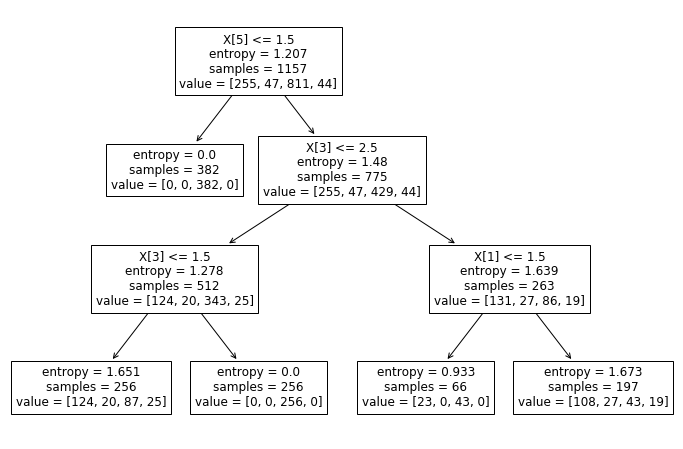

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

**Confusion matrix**

In [37]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('\nConfusion matrix\n', cm)


Confusion matrix
 [[116   0  13   0]
 [ 22   0   0   0]
 [ 60   0 339   0]
 [ 21   0   0   0]]


**Classification report**

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.90      0.67       129
        good       0.00      0.00      0.00        22
       unacc       0.96      0.85      0.90       399
       vgood       0.00      0.00      0.00        21

    accuracy                           0.80       571
   macro avg       0.37      0.44      0.39       571
weighted avg       0.79      0.80      0.78       571

